# 数据挖掘互评作业三：分类、预测与聚类

## Video Game Sales 电子游戏销售分析

## 读取数据，并查看其概况

In [1]:
import pandas as pds
data = pds.read_csv('./game/vgsales.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 丢弃缺失值，再查看数据概况

In [2]:
data.dropna(axis=0, how='any', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## 每一年发布的游戏数量统计趋势

由于统计数据具有滞后性，所以后几年发布的游戏数量呈现明显的下降

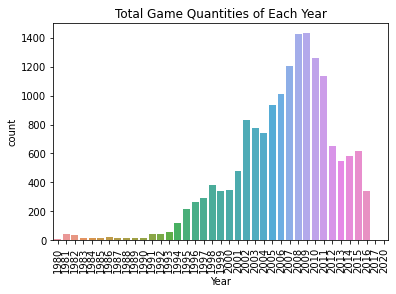

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.xticks(rotation = 90)
year = data['Year'].astype(int)
sns.countplot(x=year, data=data)
plt.title('Total Game Quantities of Each Year')
plt.show()

## 每种类型游戏的数量统计

动作类游戏最多，运动类游戏次之，拼图类最少

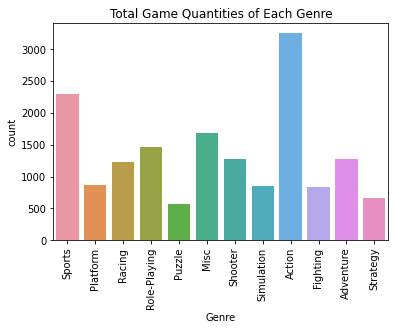

In [4]:
plt.xticks(rotation = 90)
genre = data['Genre']
sns.countplot(x=genre, data=data)
plt.title('Total Game Quantities of Each Genre')
plt.show()

## 每个平台游戏的数量统计

DS和PS2平台游戏数量最多，新平台由于推出时间较晚、游戏发布还在继续，所以现有的数量不多

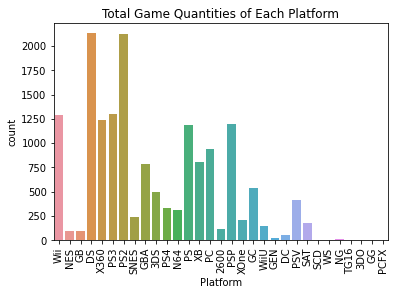

In [5]:
plt.xticks(rotation = 90)
genre = data['Platform']
sns.countplot(x=genre, data=data)
plt.title('Total Game Quantities of Each Platform')
plt.show()

## 每个类型的游戏里最受欢迎的游戏名称

In [6]:
game_sales = data[['Genre','Name']].groupby(['Genre']).agg(lambda x:x.value_counts().index[0])
genre_games = game_sales.rename(columns = {'Name' : 'Game'}, inplace = False)
genre_games

,Game
Genre,
Action,Ratatouille
Adventure,The Walking Dead: Season One
Fighting,WWE SmackDown vs Raw 2008
Misc,Monopoly
Platform,Wall-E
Puzzle,Puyo Puyo Tetris
Racing,Need for Speed: Most Wanted
Role-Playing,Marvel: Ultimate Alliance
Shooter,Call of Duty: Ghosts


## 每个游戏发行商发行的游戏数量统计

游戏数量最多的平台都是知名的大平台，这符合认知

In [7]:
number_df = data.groupby('Publisher')[['Name']].count().sort_values('Name', ascending = False).head(25)
number_clean = number_df.rename(columns = {'Name' : 'Number'}, inplace = False)
number_clean

,Number
Publisher,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823
THQ,712
Nintendo,696
Sony Computer Entertainment,682
Sega,632


## 全球最受欢迎的游戏TOP5

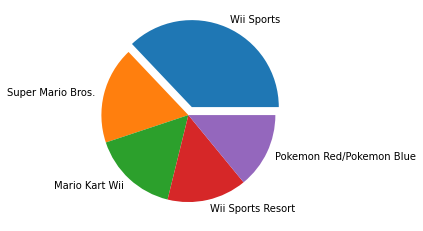

In [8]:
top_games_Global = data.sort_values('Global_Sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_Global['Global_Sales'], labels = top_games_Global['Name'], explode = explode)
plt.show()

## 最受欢迎的游戏类型TOP5

In [9]:
top_games_Genre = data[['Genre', 'Global_Sales']].groupby(['Genre'])
top_games_Genre = top_games_Genre.sum()
top_games_Genre = top_games_Genre.sort_values('Global_Sales', ascending=False).head(5)
top_games_Genre

,Global_Sales
Genre,
Action,1722.84
Sports,1309.24
Shooter,1026.20
Role-Playing,923.83
Platform,829.13


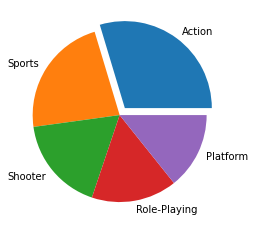

In [10]:
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_Genre['Global_Sales'], labels = top_games_Genre.index, explode = explode)
plt.show()

## 最受欢迎的游戏平台Top5

销售额不仅与游戏的数量有关，还与游戏的定价有关，随着时间的推移游戏的定价是逐步提升的，不同平台的定价也不一样，综合因素使得PS2以第二多的游戏数量获得了最高的销售额

In [11]:
top_games_Platform = data[['Platform', 'Global_Sales']].groupby(['Platform'])
top_games_Platform = top_games_Platform.sum()
top_games_Platform = top_games_Platform.sort_values('Global_Sales', ascending=False).head(5)
top_games_Platform

,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35
Wii,909.81
DS,818.91


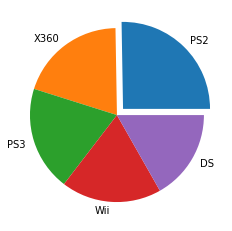

In [12]:
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_Platform['Global_Sales'], labels = top_games_Platform.index, explode = explode)
plt.show()

## 最受欢迎的游戏发行商TOP5

销售额最高的依旧是知名的大型游戏厂商

In [13]:
top_games_Publisher = data[['Publisher', 'Global_Sales']].groupby(['Publisher'])
top_games_Publisher = top_games_Publisher.sum()
top_games_Publisher = top_games_Publisher.sort_values('Global_Sales', ascending=False).head(5)
top_games_Publisher

,Global_Sales
Publisher,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.54


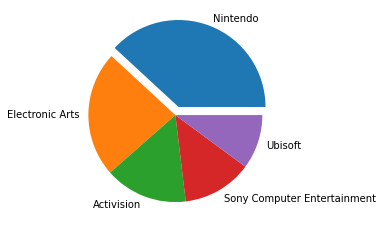

In [14]:
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_Publisher['Global_Sales'], labels = top_games_Publisher.index, explode = explode)
plt.show()

## 全球游戏销售额与时间的关系

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

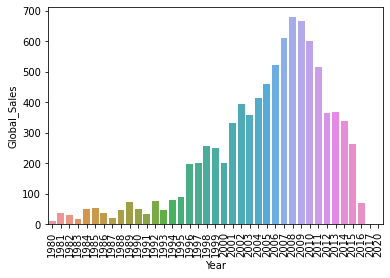

In [15]:
games_Year = data[['Year', 'Global_Sales']].groupby(['Year'])
games_Year = games_Year.sum()
plt.xticks(rotation = 90)
sns.barplot(x=games_Year.index.astype('int'), y=games_Year['Global_Sales'])

## 销售额之间的相关性分析

北美地区和欧洲地区的销售额与全球销售额的相关性较高

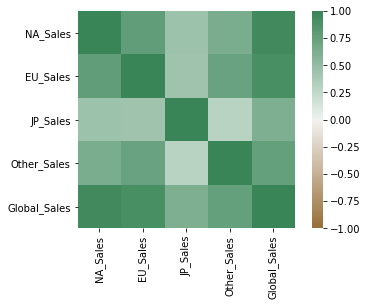

In [16]:
vg_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
correlation_vg_sales = vg_sales.corr()
axis_corr = sns.heatmap(correlation_vg_sales,
                        vmin=-1, vmax=1, center=0,
                        cmap=sns.diverging_palette(50, 500, n=500),
                        square=True)
plt.show()

## 查看游戏销售量与年份的关系

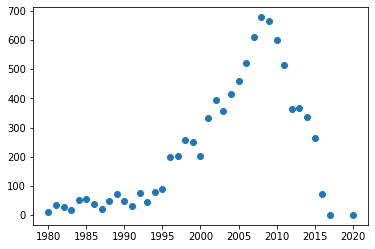

In [17]:
import numpy as np
x=np.array(games_Year.index.tolist()).reshape(-1, 1)
y=np.array(games_Year['Global_Sales'].tolist())
plt.scatter(x, y)

## 使用多项式回归拟合游戏销售量的变化趋势

后九年的游戏销量由于还未达到稳定的水平而呈现逐年下降的趋势，对于预测来说没有太大的参考意义，所以将其从数据集中删除，仅拟合此前的销售数据

In [18]:
import sklearn.pipeline as pl
import sklearn.linear_model as lm
import sklearn.preprocessing as sp

poly_model = pl.make_pipeline(sp.PolynomialFeatures(5), lm.LinearRegression())
poly_model.fit(x[:-9], y[:-9])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

## 查看多项式回归的拟合情况和数据预测情况

从图中可以看到，多项式回归可以很好的拟合游戏销售数据，并对未来的销售额做出合理预测

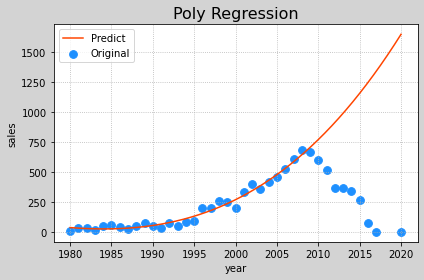

In [19]:
px = np.linspace(x.min(), x.max(), 1000)
px = px.reshape(-1, 1)
pred_py = poly_model.predict(px)

# 绘制图像
plt.figure("Poly Regression", facecolor='lightgray')
plt.title('Poly Regression', fontsize=16)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.xlabel('year')
plt.ylabel('sales')

plt.scatter(x, y, s=60, marker='o', c='dodgerblue', label='Original')
plt.plot(px, pred_py, c='orangered', label='Predict')
plt.tight_layout()
plt.legend()
plt.show()